<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/QS_world_university_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%pip install --quiet git+https://github.com/iseedeep/deeprage.git@main
from deeprage.core import RageReport, val_bar, val_pie, val_hist

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 98.4 MB/s eta 0:00:00


In [5]:
df = pd.read_csv('QS.csv', encoding='ISO-8859-1')
df.head(11)

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7
5,6,5,Stanford University,United States,Americas,L,FC,VH,B,100.0,...,284,60.8,244,96.8,45,100.0,2,81.2,148=,96.1
6,7,7,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland,Europe,L,FO,VH,A,98.8,...,25,98.6,63,95.7,64,90.5,73,98.8,18,93.9
7,8,8,National University of Singapore (NUS),Singapore,Asia,XL,FC,VH,A,99.5,...,41,88.9,129,91.6,146,100.0,6,97.7,26=,93.7
8,9,9,UCL,United Kingdom,Europe,XL,FC,VH,A,99.5,...,106,100.0,21,99.9,2,70.3,157,74.8,190=,91.6
9,10,15,California Institute of Technology (Caltech),United States,Americas,S,CO,VH,B,96.5,...,65,79.8,172,65.5,549,31.0,407,62.5,253,90.9


In [6]:
df.tail(11)

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
1492,1401+,1401+,Universitas Muhammadiyah Surakarta,Indonesia,Asia,L,FO,HI,B,5.5,...,701+,1.1,701+,4.5,701+,2.3,701+,1.0,701+,NaN
1493,1401+,1201-1400,Universiti Sains Islam Malaysia,Malaysia,Asia,M,CO,HI,A,6.6,...,701+,6.1,701+,12.5,701+,3.3,701+,1.0,701+,NaN
1494,1401+,1201-1400,University of Central Oklahoma,United States,Americas,L,CO,MD,A,5.6,...,654,9.9,701+,5.2,701+,2.9,701+,1.0,701+,NaN
1495,1401+,1401+,University of Craiova,Romania,Europe,L,CO,HI,A,4.5,...,NaN,NaN,NaN,21.8,701+,13.4,701+,1.0,701+,NaN
1496,1401+,1401+,University of Lampung,Indonesia,Asia,L,FC,MD,NaN,4.7,...,701+,1.0,701+,3.4,701+,2.2,701+,1.0,701+,NaN
1497,1401+,1401+,University of Mataram,Indonesia,Asia,XL,FO,MD,A,6.4,...,701+,1.0,701+,3.7,701+,2.2,701+,1.0,701+,NaN
1498,1401+,1201-1400,University of Montana Missoula,United States,Americas,M,CO,HI,A,3.0,...,701+,1.9,701+,6.5,701+,3.1,701+,1.0,701+,NaN
1499,1401+,1401+,University of Oradea,Romania,Europe,L,FC,MD,A,5.6,...,701+,5.2,701+,34.5,701+,6.2,701+,2.3,701+,NaN
1500,1401+,1201-1400,University of San Carlos,Philippines,Asia,M,CO,MD,C,7.2,...,701+,2.1,701+,6.4,701+,9.6,701+,1.0,701+,NaN
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",Romania,Europe,L,FO,VH,A,4.1,...,701+,2.5,701+,18.6,701+,3.9,701+,1.1,701+,NaN


In [7]:
df.shape

(1503, 28)

In [8]:
df.columns

Index(['RANK_2025', 'RANK_2024', 'Institution_Name', 'Location', 'Region',
       'SIZE', 'FOCUS', 'RES.', 'STATUS', 'Academic_Reputation_Score',
       'Academic_Reputation_Rank', 'Employer_Reputation_Score',
       'Employer_Reputation_Rank', 'Faculty_Student_Score',
       'Faculty_Student_Rank', 'Citations_per_Faculty_Score',
       'Citations_per_Faculty_Rank', 'International_Faculty_Score',
       'International_Faculty_Rank', 'International_Students_Score',
       'International_Students_Rank', 'International_Research_Network_Score',
       'International_Research_Network_Rank', 'Employment_Outcomes_Score',
       'Employment_Outcomes_Rank', 'Sustainability_Score',
       'Sustainability_Rank', 'Overall_Score'],
      dtype='object')

In [9]:
df.dtypes

,0
RANK_2025,object
RANK_2024,object
Institution_Name,object
Location,object
Region,object
SIZE,object
FOCUS,object
RES.,object
STATUS,object
Academic_Reputation_Score,float64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1482 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1466 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  Employer_Reputati

In [11]:
df.describe()

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_per_Faculty_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Employment_Outcomes_Score,Sustainability_Score
count,1503.000000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.286693,19.787292,28.128676,23.503460,30.736707,25.580346,50.129095,23.825083,24.309299
std,22.326168,23.784738,27.613017,27.870692,34.344365,31.098689,29.866588,27.351315,31.074718
min,1.300000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.300000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.000000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.500000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [12]:
df.isnull().sum()

,0
RANK_2025,0
RANK_2024,21
Institution_Name,0
Location,0
Region,0
SIZE,0
FOCUS,0
RES.,0
STATUS,37
Academic_Reputation_Score,0


In [14]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

,0
RANK_2025,0
RANK_2024,0
Institution_Name,0
Location,0
Region,0
SIZE,0
FOCUS,0
RES.,0
STATUS,0
Academic_Reputation_Score,0


In [17]:
df.duplicated().sum()

np.int64(0)

#Visualization

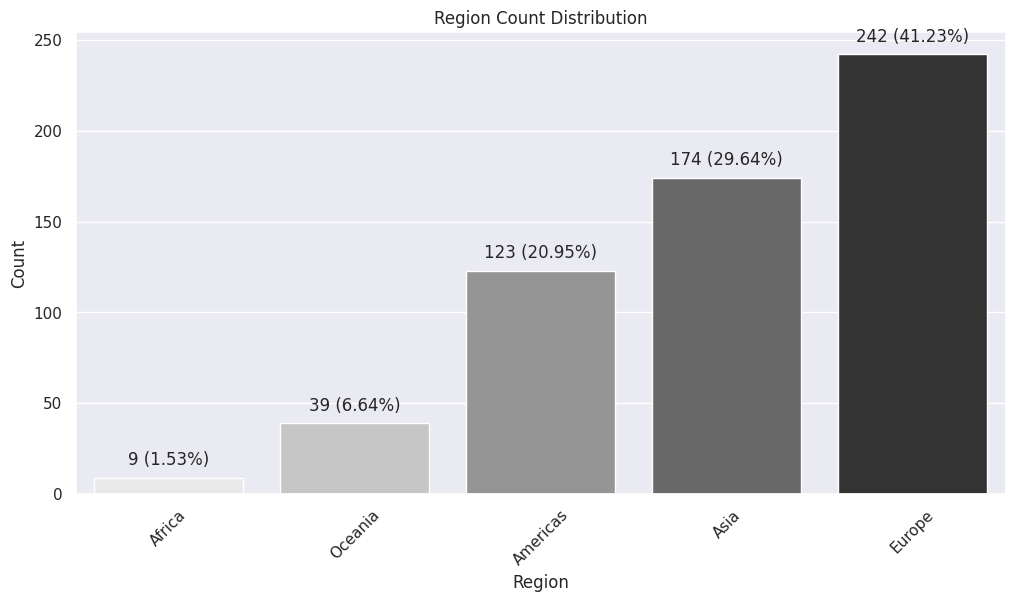

In [18]:
val_bar(df, 'Region')

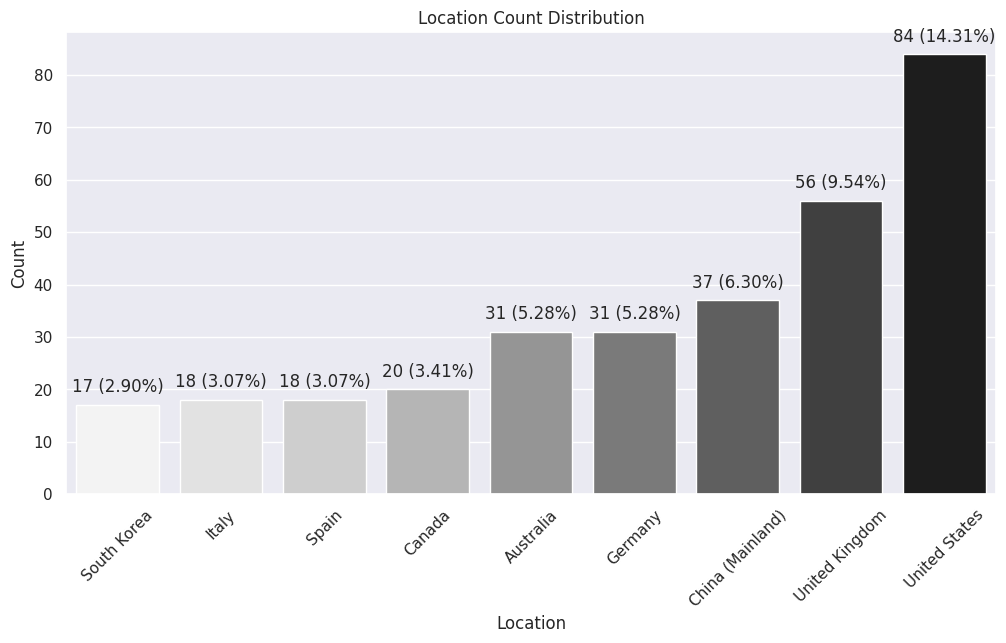

In [19]:
val_bar(df, 'Location')

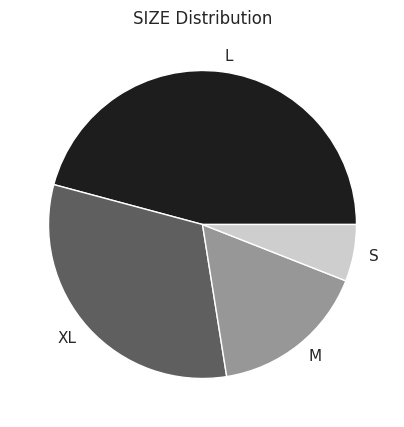

In [20]:
val_pie(df, 'SIZE')

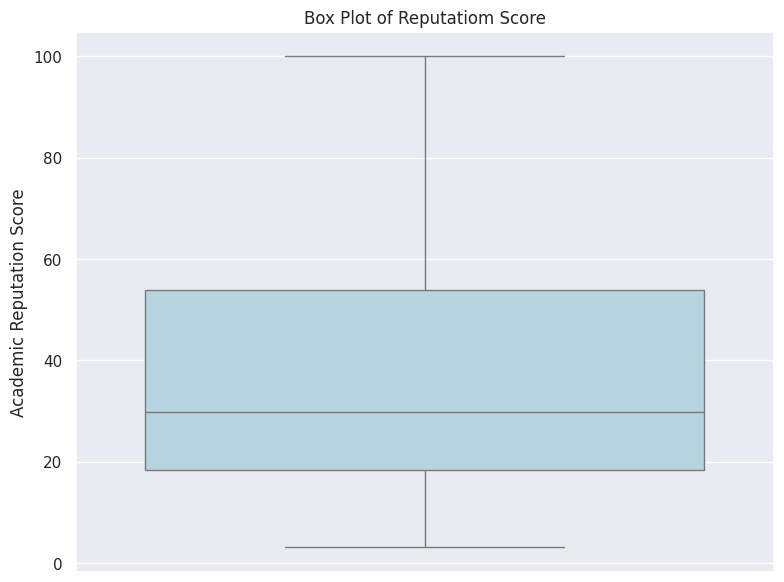

In [24]:
# Box Plot for Income Distribution
plt.figure(figsize=(8,6))
sns.boxplot(y='Academic_Reputation_Score', data=df, color='lightblue')
plt.title('Box Plot of Reputatiom Score')
plt.ylabel('Academic Reputation Score')
plt.tight_layout()
plt.show()

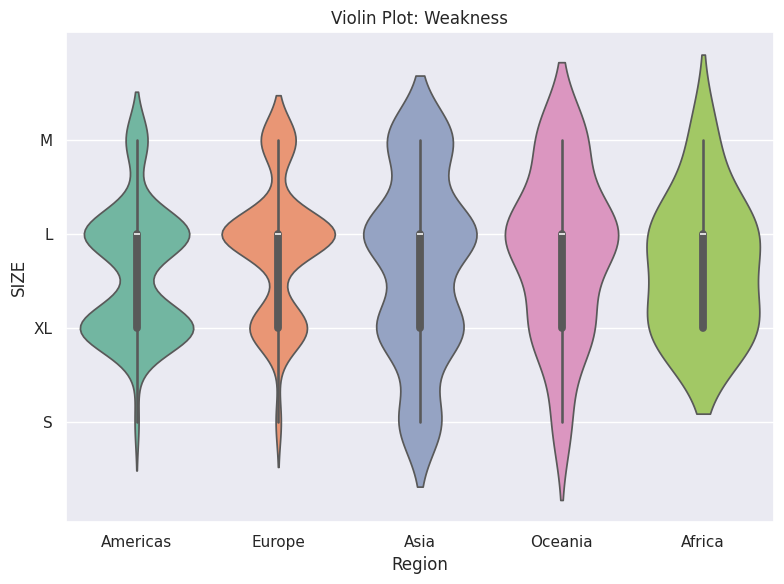

In [27]:
# Violin Plot for Age distribution across Sex
plt.figure(figsize=(8,6))
sns.violinplot(x='Region', y='SIZE', data=df, palette='Set2')
plt.title('Violin Plot: Weakness')
plt.tight_layout()
plt.show()

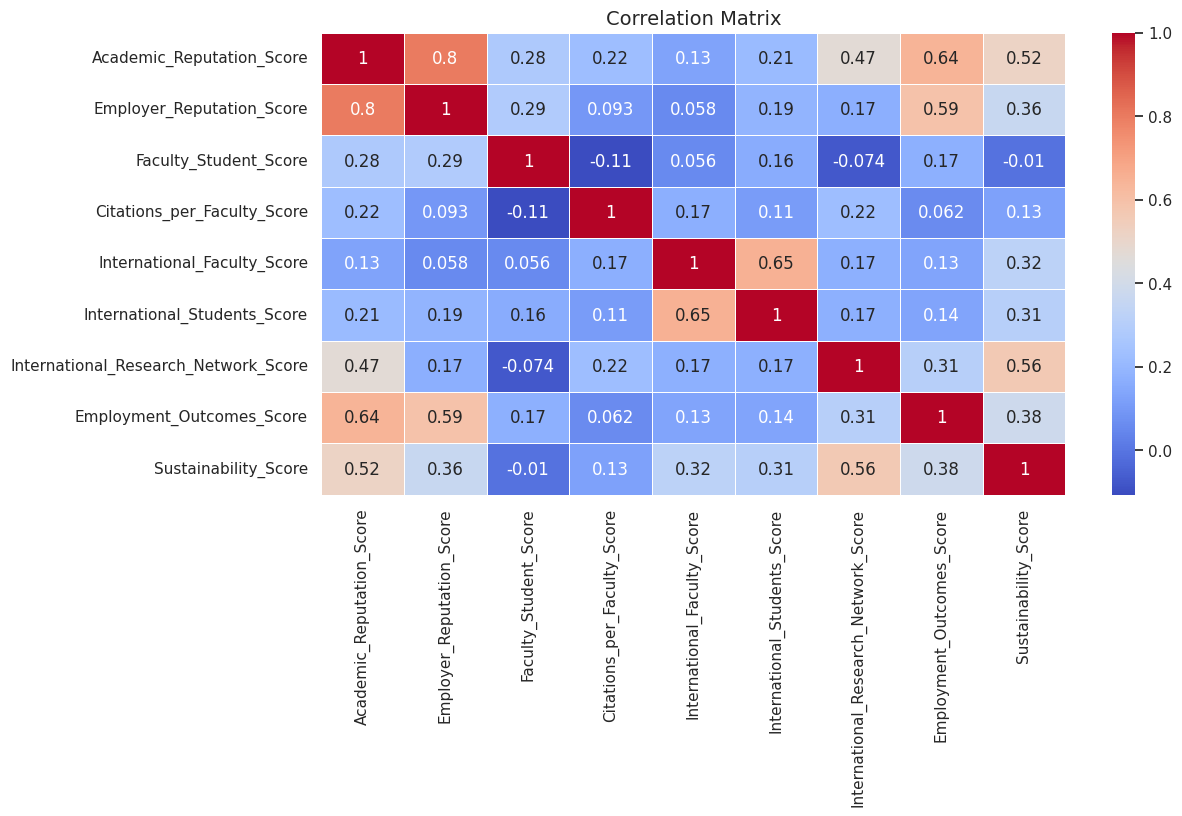

In [31]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [29]:
# Thank you